# Q5 - Histogram Equalization

In [24]:
import numpy as np, cv2 as cv, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data/a1images")
RESULTS = Path("../results/q5")
RESULTS.mkdir(parents=True, exist_ok=True)

img_path = DATA / "shells.tif"
img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
assert img is not None, f"Image not found at {img_path}"
print("Loaded:", img_path, "shape:", img.shape, "dtype:", img.dtype)

Loaded: ../data/a1images/shells.tif shape: (500, 500) dtype: uint8


In [25]:
# Core: histogram equalization (own implementation, uint8)
def hist_equalize_gray(gray_u8: np.ndarray) -> np.ndarray:
    """Return histogram-equalized grayscale image (uint8) WITHOUT using OpenCV equalize."""
    assert gray_u8.dtype == np.uint8 and gray_u8.ndim == 2
    # histogram (0..255)
    hist = np.bincount(gray_u8.ravel(), minlength=256).astype(np.float64)
    pmf = hist / hist.sum()
    cdf = np.cumsum(pmf)                           # [0..1]
    mapping = np.floor(255 * cdf + 0.5).astype(np.uint8)  # round-to-nearest
    return mapping[gray_u8], hist, cdf, mapping

In [26]:
# Grayscale path
gray = img.astype(np.uint8)
eq, hist, cdf, mapping = hist_equalize_gray(gray)

# Save outputs
cv.imwrite(str(RESULTS/"q5_equalized.png"), eq)
cv.imwrite(str(RESULTS/"q5_original.png"), gray)

True

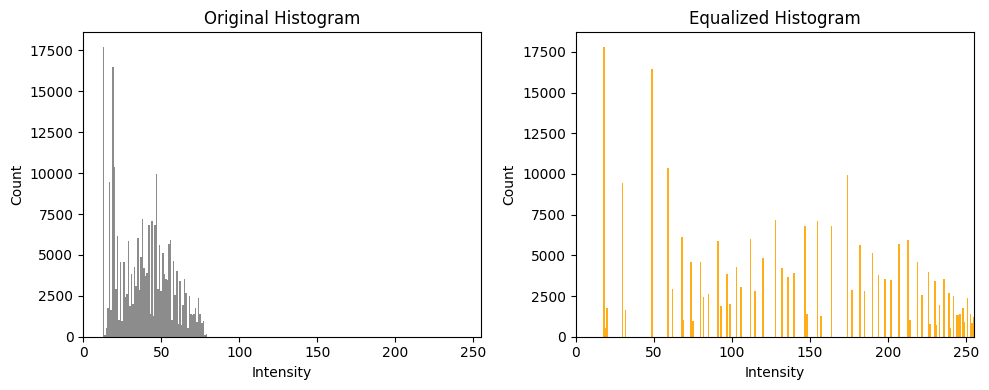

In [27]:
# Plot histograms before/after
bins = np.arange(257)
hist_eq = np.bincount(eq.ravel(), minlength=256)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(bins[:-1], hist, width=1, alpha=0.9, color='gray')
plt.title("Original Histogram"); plt.xlabel("Intensity"); plt.ylabel("Count"); plt.xlim(0,255)

plt.subplot(1,2,2)
plt.bar(bins[:-1], hist_eq, width=1, alpha=0.9, color='orange')
plt.title("Equalized Histogram"); plt.xlabel("Intensity"); plt.ylabel("Count"); plt.xlim(0,255)

plt.tight_layout(); plt.savefig(RESULTS/"q5_histograms_gray.png", dpi=150); plt.show()

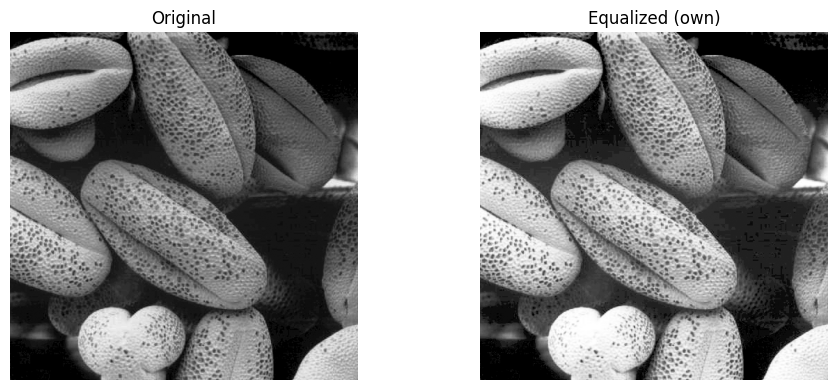

In [28]:
# Side-by-side
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(eq,   cmap='gray'); plt.title("Equalized (own)"); plt.axis('off')
plt.tight_layout(); plt.savefig(RESULTS/"q5_before_after_gray.png", dpi=150); plt.show()
